# Multi-layer Perceptron classifier

In this notebook, we will use MLPClassifier from `scikit-learn` on the MNIST datset for handwritten digits.

https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn
seaborn.set(style='whitegrid'); seaborn.set_context('talk')

# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')
X = X / 255.0

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Creating a Multi-layer Perceptron classifier model

`hidden_layer_sizes:` Hidden layer size, default=(100,) the ith element represents the number of neurons in the ith hidden layer.

`max_iter:` default=200

`activation:` Activation function for the hidden layer, default='relu'

`alpha:` Strength of the L2 regularization term, default=0.0001

`solver:` Weight optimisation, default='adam', here we will use 'sgd'

`verbose:` To print progress messages. default=False

`learning_rate_init:` initial learning rate, default=0.001

In [ ]:
# Create an MLPClassifier model

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=50,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)

Train the model on the training data


In [ ]:
# Train the model on the training data

import warnings
from sklearn.exceptions import ConvergenceWarning

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.28679173
Iteration 2, loss = 0.13898414
Iteration 3, loss = 0.11234183
Iteration 4, loss = 0.09240505
Iteration 5, loss = 0.08218895
Iteration 6, loss = 0.07512368
Iteration 7, loss = 0.06824016
Iteration 8, loss = 0.06323142
Iteration 9, loss = 0.05593160
Iteration 10, loss = 0.05292344
Iteration 11, loss = 0.04932607
Iteration 12, loss = 0.04832868
Iteration 13, loss = 0.04161856
Iteration 14, loss = 0.03879617
Iteration 15, loss = 0.03889259
Iteration 16, loss = 0.03470096
Iteration 17, loss = 0.03510782
Iteration 18, loss = 0.03438813
Iteration 19, loss = 0.03140666
Iteration 20, loss = 0.02943279
Iteration 21, loss = 0.02719182
Iteration 22, loss = 0.03072773
Iteration 23, loss = 0.02634794
Iteration 24, loss = 0.02583843
Iteration 25, loss = 0.02614071
Iteration 26, loss = 0.02237447
Iteration 27, loss = 0.02066707
Iteration 28, loss = 0.01924857
Iteration 29, loss = 0.01762789
Iteration 30, loss = 0.02013231
Iteration 31, loss = 0.01791572
Iteration 32, los

In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Training set score: 0.999982
Test set score: 0.969786
Accuracy: 0.97


In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.97      0.96      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.96      0.97      0.96      1273
           6       0.98      0.99      0.98      1396
           7       0.98      0.96      0.97      1503
           8       0.96      0.95      0.95      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
print(cm)

[[1315    1    3    1    2    3    5    5    7    1]
 [   0 1581    5    3    2    0    1    5    2    1]
 [   2    7 1335    2    5    4    5    5   12    3]
 [   1    2   15 1383    1   16    0    3    6    6]
 [   2    0    1    1 1260    1    5    4    2   19]
 [   3    1    2   16    1 1230    9    1    6    4]
 [   1    1    2    1    5    7 1376    0    3    0]
 [   4    8   15    3    2    2    0 1446    6   17]
 [   4    8   11   15    5   10    8    4 1284    8]
 [   4    5    0    8   16    5    1    9    5 1367]]


Visualization of MLP weights on MNIST

Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. For example if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, maybe regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784 features in the dataset. Therefore the first layer weight matrix has the shape (784, hidden_layer_sizes[0]). We can therefore visualize a single column of the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only for a very short time. Training longer would result in weights with a much smoother spatial appearance. The example will throw a warning because it doesn’t converge, in this case this is what we want because of resource usage constraints on our Continuous Integration infrastructure that is used to build this documentation on a regular basis.

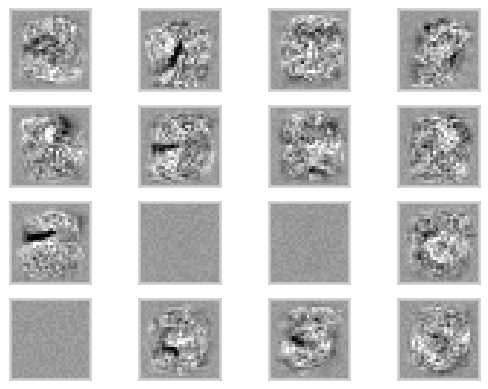

In [ ]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())